# MLP Approach

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [5]:
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
# build the dataset

block_size = 3 # context length: how many chars do we take to predict the next one?
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), "----->", itos[ix])
        context = context[1:] + [ix] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)        

emma
... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
olivia
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
ava
... -----> a
..a -----> v
.av -----> a
ava -----> .
isabella
... -----> i
..i -----> s
.is -----> a
isa -----> b
sab -----> e
abe -----> l
bel -----> l
ell -----> a
lla -----> .
sophia
... -----> s
..s -----> o
.so -----> p
sop -----> h
oph -----> i
phi -----> a
hia -----> .


In [9]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [10]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [11]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [13]:
# implementing embedding look up table

C = torch.randn((27, 2)) # crushing it down to 2 dimensional space i.,e each of 27 character will have 2 dimensional embedding

In [14]:
C

tensor([[ 1.9404, -1.5035],
        [ 0.5361,  0.1217],
        [ 0.4444, -1.5622],
        [ 1.3728,  0.5063],
        [ 0.3418, -0.3972],
        [-0.4004,  0.3359],
        [ 0.3177, -1.5634],
        [ 0.3532, -0.3383],
        [ 0.5195,  0.2430],
        [-0.7995, -1.0605],
        [-0.3173,  1.5612],
        [ 0.4668,  1.6231],
        [-0.5841, -0.1667],
        [ 0.5216,  0.0034],
        [-0.9772, -1.3939],
        [ 0.9766, -0.2623],
        [ 0.3048,  0.4096],
        [-0.9241, -1.5369],
        [ 0.9071, -0.4915],
        [ 1.5522, -1.0185],
        [ 0.1142, -0.2633],
        [ 0.8593, -0.0163],
        [-1.1607, -0.5176],
        [ 0.5443, -0.6983],
        [ 1.4972,  0.4175],
        [ 0.6250, -1.0129],
        [ 2.3464, -0.6583]])

In [15]:
# how to use this table?
# one way to do is like this:
# suppose we want to embedd int 5, then directly index the 5th row
C[5]

tensor([-0.4004,  0.3359])

In [19]:
# other way
# F.one_hot(5, num_classes=27) # this not works because 5 must be a tensor not int
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # mat mul of 1*27 X 27*2 => 1*2


tensor([-0.4004,  0.3359])

In [20]:
# pytorch indexing is flexible we can index with list
C[[5,6,7]] # returns 5, 6 and 7 rows

tensor([[-0.4004,  0.3359],
        [ 0.3177, -1.5634],
        [ 0.3532, -0.3383]])

In [21]:
# also works with tensors
C[torch.tensor([5,6,7])]

tensor([[-0.4004,  0.3359],
        [ 0.3177, -1.5634],
        [ 0.3532, -0.3383]])

In [22]:
# can also repeat rows
C[torch.tensor([5,6,7,7,7,7,7])]

tensor([[-0.4004,  0.3359],
        [ 0.3177, -1.5634],
        [ 0.3532, -0.3383],
        [ 0.3532, -0.3383],
        [ 0.3532, -0.3383],
        [ 0.3532, -0.3383],
        [ 0.3532, -0.3383]])

In [25]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [23]:
C[X]

tensor([[[ 1.9404, -1.5035],
         [ 1.9404, -1.5035],
         [ 1.9404, -1.5035]],

        [[ 1.9404, -1.5035],
         [ 1.9404, -1.5035],
         [-0.4004,  0.3359]],

        [[ 1.9404, -1.5035],
         [-0.4004,  0.3359],
         [ 0.5216,  0.0034]],

        [[-0.4004,  0.3359],
         [ 0.5216,  0.0034],
         [ 0.5216,  0.0034]],

        [[ 0.5216,  0.0034],
         [ 0.5216,  0.0034],
         [ 0.5361,  0.1217]],

        [[ 1.9404, -1.5035],
         [ 1.9404, -1.5035],
         [ 1.9404, -1.5035]],

        [[ 1.9404, -1.5035],
         [ 1.9404, -1.5035],
         [ 0.9766, -0.2623]],

        [[ 1.9404, -1.5035],
         [ 0.9766, -0.2623],
         [-0.5841, -0.1667]],

        [[ 0.9766, -0.2623],
         [-0.5841, -0.1667],
         [-0.7995, -1.0605]],

        [[-0.5841, -0.1667],
         [-0.7995, -1.0605],
         [-1.1607, -0.5176]],

        [[-0.7995, -1.0605],
         [-1.1607, -0.5176],
         [-0.7995, -1.0605]],

        [[-1.1607, -0

In [24]:
C[X].shape

torch.Size([32, 3, 2])

for each 32,3 we retrieve 2 emebddings


In [26]:
X[13,2]

tensor(1)

In [28]:
C[X][13,2]

tensor([0.5361, 0.1217])

In [29]:
C[1]

tensor([0.5361, 0.1217])

In [30]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

## MLP Construction

In [31]:
# constructing MLP

W1 = torch.randn((6, 100)) # 100 neurons in 1st hidden layer, and input will be 3*2 = 6... therefore w1 shape = 6,100
# 2 2 2
b1 = torch.randn((100)) # each neuron will have bias

# gen we do emb @ W1 + b1 => this will not work here, as emb shape is different, so we need to stack them to form (32,6)

In [32]:
emb[:, 0, :] # this is 32 embeddings of 1st context

tensor([[ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [-0.4004,  0.3359],
        [ 0.5216,  0.0034],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 0.9766, -0.2623],
        [-0.5841, -0.1667],
        [-0.7995, -1.0605],
        [-1.1607, -0.5176],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 0.5361,  0.1217],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [-0.7995, -1.0605],
        [ 1.5522, -1.0185],
        [ 0.5361,  0.1217],
        [ 0.4444, -1.5622],
        [-0.4004,  0.3359],
        [-0.5841, -0.1667],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 1.9404, -1.5035],
        [ 1.5522, -1.0185],
        [ 0.9766, -0.2623],
        [ 0.3048,  0.4096],
        [ 0.5195,  0.2430]])

In [33]:
torch.concat([emb[:,0,:], emb[:, 1, :], emb[:, 2, :]], dim=1) # this is ugly and won't generalize if we change context size. torch.unbind to the rescue

tensor([[ 1.9404, -1.5035,  1.9404, -1.5035,  1.9404, -1.5035],
        [ 1.9404, -1.5035,  1.9404, -1.5035, -0.4004,  0.3359],
        [ 1.9404, -1.5035, -0.4004,  0.3359,  0.5216,  0.0034],
        [-0.4004,  0.3359,  0.5216,  0.0034,  0.5216,  0.0034],
        [ 0.5216,  0.0034,  0.5216,  0.0034,  0.5361,  0.1217],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  1.9404, -1.5035],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  0.9766, -0.2623],
        [ 1.9404, -1.5035,  0.9766, -0.2623, -0.5841, -0.1667],
        [ 0.9766, -0.2623, -0.5841, -0.1667, -0.7995, -1.0605],
        [-0.5841, -0.1667, -0.7995, -1.0605, -1.1607, -0.5176],
        [-0.7995, -1.0605, -1.1607, -0.5176, -0.7995, -1.0605],
        [-1.1607, -0.5176, -0.7995, -1.0605,  0.5361,  0.1217],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  1.9404, -1.5035],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  0.5361,  0.1217],
        [ 1.9404, -1.5035,  0.5361,  0.1217, -1.1607, -0.5176],
        [ 0.5361,  0.1217, -1.1607, -0.5

In [34]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape # this is not efficient as, whole new copy of tensor will be created

torch.Size([32, 6])

In [35]:
# there is also other way to do

In [36]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [37]:
a.shape

torch.Size([18])

In [38]:
a.view(2,9) # it is extremely efficient operation, as it is just logical view of the 1D representation of the numbers stored in memory. 

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [41]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [43]:
emb.view(32,6) # exact same result as unbind and then cat

tensor([[ 1.9404, -1.5035,  1.9404, -1.5035,  1.9404, -1.5035],
        [ 1.9404, -1.5035,  1.9404, -1.5035, -0.4004,  0.3359],
        [ 1.9404, -1.5035, -0.4004,  0.3359,  0.5216,  0.0034],
        [-0.4004,  0.3359,  0.5216,  0.0034,  0.5216,  0.0034],
        [ 0.5216,  0.0034,  0.5216,  0.0034,  0.5361,  0.1217],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  1.9404, -1.5035],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  0.9766, -0.2623],
        [ 1.9404, -1.5035,  0.9766, -0.2623, -0.5841, -0.1667],
        [ 0.9766, -0.2623, -0.5841, -0.1667, -0.7995, -1.0605],
        [-0.5841, -0.1667, -0.7995, -1.0605, -1.1607, -0.5176],
        [-0.7995, -1.0605, -1.1607, -0.5176, -0.7995, -1.0605],
        [-1.1607, -0.5176, -0.7995, -1.0605,  0.5361,  0.1217],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  1.9404, -1.5035],
        [ 1.9404, -1.5035,  1.9404, -1.5035,  0.5361,  0.1217],
        [ 1.9404, -1.5035,  0.5361,  0.1217, -1.1607, -0.5176],
        [ 0.5361,  0.1217, -1.1607, -0.5

In [44]:
# h = emb.view(32,6) @ W1 + b1
h = emb.view(emb.shape[0],6) @ W1 + b1
# or
# h = emb.view(-1,6) @ W1 + b1 # -1 means torch will automatically derive
h # hidden neuron values

tensor([[ 2.2974,  1.1897,  2.5344,  ..., -3.9235,  0.7020,  2.8411],
        [-0.0312, -0.6600,  4.7177,  ...,  0.0516,  1.2923,  3.3766],
        [-1.0347,  0.8982,  0.5400,  ...,  0.2774,  1.4483,  3.7253],
        ...,
        [ 0.4434,  0.1480, -0.5656,  ..., -0.6855,  0.6434,  2.5376],
        [ 2.0891, -1.6259, -0.2646,  ..., -1.6366, -1.6166,  1.9510],
        [-0.6369,  0.5336,  0.0916,  ..., -1.5618,  0.8904,  2.9662]])

In [45]:
h.shape

torch.Size([32, 100])

In [46]:
h = torch.tanh(h)
h # after activation

tensor([[ 0.9800,  0.8305,  0.9875,  ..., -0.9992,  0.6057,  0.9932],
        [-0.0312, -0.5783,  0.9998,  ...,  0.0516,  0.8597,  0.9977],
        [-0.7758,  0.7154,  0.4930,  ...,  0.2705,  0.8954,  0.9988],
        ...,
        [ 0.4165,  0.1469, -0.5122,  ..., -0.5951,  0.5672,  0.9876],
        [ 0.9698, -0.9255, -0.2586,  ..., -0.9270, -0.9241,  0.9604],
        [-0.5628,  0.4881,  0.0914,  ..., -0.9157,  0.7116,  0.9947]])

In [47]:
# final layer / output layer

W2 = torch.randn((100, 27)) # output will be 27 because we have 27 possible character
b2 = torch.randn(27)

In [48]:
logits = h @ W2 + b2

In [50]:
logits.shape

torch.Size([32, 27])

In [51]:
counts = logits.exp()

In [52]:
prob = counts / counts.sum(1, keepdim=True)

In [53]:
prob.shape

torch.Size([32, 27])

In [55]:
prob[0].sum()

tensor(1.0000)

In [56]:
Y # actual letter that comes next

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
prob[torch.arange(32), Y] # for each of 32 rows, take out corresponding Y value

tensor([1.4407e-04, 1.1995e-09, 4.7608e-08, 2.0627e-05, 5.3407e-07, 9.1687e-10,
        4.1349e-05, 1.5292e-09, 2.1351e-03, 9.1722e-10, 1.1201e-13, 1.5086e-04,
        2.9540e-17, 9.8037e-01, 2.1496e-19, 6.2215e-09, 3.9136e-08, 2.1172e-11,
        3.1307e-11, 1.2419e-06, 1.0465e-08, 9.6371e-06, 3.8820e-09, 1.1328e-05,
        1.7697e-04, 3.5139e-13, 3.0442e-10, 6.1513e-09, 6.6223e-04, 2.6595e-02,
        3.7971e-06, 2.3162e-09])

above gives current probabilities assigned by our model

In [58]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.1802)

This loss we like to minimize

## Putting things Together

In [ ]:
# ------------------- making above code more respectable -------------------------

In [59]:
X.shape, Y.shape  # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [112]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g) 
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [62]:
sum(p.nelement() for p in parameters) # number of parameters

3481

In [ ]:
emb = C[X] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

In [64]:
F.cross_entropy(logits, Y) # this calculates the same loss as we calculated above, but in more efficient way

tensor(17.7697)

Should use cross entropy loss because manaully doing exp is not good always, suppose if logit is 100 then exp(100) is very large number and it will be infinity because it is out of range of float32, so we should use cross entropy loss

In [113]:
for p in parameters:
    p.requires_grad = True

In [74]:
for _ in range(1000):
    # forward pass
    emb = C[X] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

0.2552131712436676


This is fitting well because we have only 32 examples. So we are overfitting single batch of the data

In [75]:
logits.max(1)

torch.return_types.max(
values=tensor([13.4804, 18.1073, 20.7400, 20.8214, 16.9568, 13.4804, 16.2107, 14.3532,
        16.0956, 18.6157, 16.1837, 21.1566, 13.4804, 17.3797, 17.3763, 20.3180,
        13.4804, 16.8032, 15.3869, 17.3204, 18.7825, 16.2197, 11.0970, 10.8826,
        15.6570, 13.4804, 16.3801, 17.1818, 12.8922, 16.3669, 19.3425, 16.3280],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [76]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

logits are very close to the actual

In [77]:
itos[19]

's'

We can't be able to make loss 0 because if we see training set, then ... should predict 'e', well in another example, ... should predict 'o', 'a', 'i', etc. So we can't make loss 0

## Fitting on whole dataset

In [78]:
# build the dataset

block_size = 3 # context length: how many chars do we take to predict the next one?
X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)        

In [79]:
X.shape, Y.shape  # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [106]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g) 
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [107]:
for p in parameters:
    p.requires_grad = True

In [85]:
for _ in range(10):
    # forward pass
    emb = C[X] # [27K, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (27K, 100)
    logits = h @ W2 + b2 # (27K, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
        
# print(loss.item())

10.709586143493652
10.407631874084473
10.127808570861816
9.864364624023438
9.614501953125
9.376439094543457
9.148944854736328
8.931110382080078
8.722230911254883
8.521748542785645


We can see that, each iteration takes much time because we are doing forward, backward and update on 22k examples. What people do is they perform on mini batches. 

In [87]:
torch.randint(0, 5, (32,))

tensor([0, 3, 4, 4, 1, 2, 2, 0, 3, 3, 0, 2, 0, 2, 1, 4, 1, 0, 2, 2, 1, 4, 3, 3,
        3, 4, 3, 0, 2, 2, 3, 4])

In [95]:
for _ in range(100):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    # forward pass
    emb = C[X[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

2.7544851303100586


Now it is much faster

## Finding good learning rate

In [97]:
lre = torch.linspace(-3, 0, 1000) # 1000 nos
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [108]:
lri = []
lossi = []
for i in range(1000):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    # forward pass
    emb = C[X[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = lrs[i]
    for p in parameters:
        p.data +=  -lr * p.grad
        
    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
        
print(loss.item())

7.310975551605225


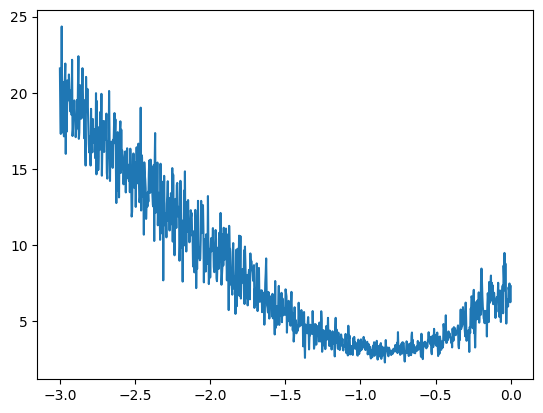

In [109]:
plt.plot(lri, lossi)

Somewhere around -1 we have good lr. So 10^-1 is good learning rate

In [120]:
lri = []
lossi = []
for i in range(10000):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    # forward pass
    emb = C[X[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 0.1
    for p in parameters:
        p.data +=  -lr * p.grad

In [121]:
# loss on whole dataset
emb = C[X] 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3976, grad_fn=<NllLossBackward0>)

We have surpassed bigram model loss. It was around 2.45 and we got here 2.40

## Learning rate decay

In [130]:
for i in range(10000):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    # forward pass
    emb = C[X[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 0.01
    for p in parameters:
        p.data +=  -lr * p.grad

In [131]:
# loss on whole dataset
emb = C[X] 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3180, grad_fn=<NllLossBackward0>)

## Train Val Test split

In [132]:
# train dev/val test split
# 80%    10%     10%

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    
    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)   
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])    
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [134]:
Xtr.shape, Ytr.shape  # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [135]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g) 
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [136]:
for p in parameters:
    p.requires_grad = True

In [139]:
for _ in range(10000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

2.3065052032470703


In [141]:
# loss on training dataset
emb = C[Xtr] 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.4402639865875244

In [140]:
# loss on dev dataset
emb = C[Xdev] 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.4435853958129883

Training and val loss are fairly equal, so we are not overfitting the data. Currently we are underfitting because our model is fairly simple.

## Experimenting with larger hidden layers

In [156]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g) 
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [157]:
sum(p.nelement() for p in parameters) # number of parameters

10281

In [158]:
for p in parameters:
    p.requires_grad = True

In [167]:
lossi = []
stepi = []

for i in range(30000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    stepi.append(i)
    lossi.append(loss.item())
        
print(loss.item())

2.173396587371826


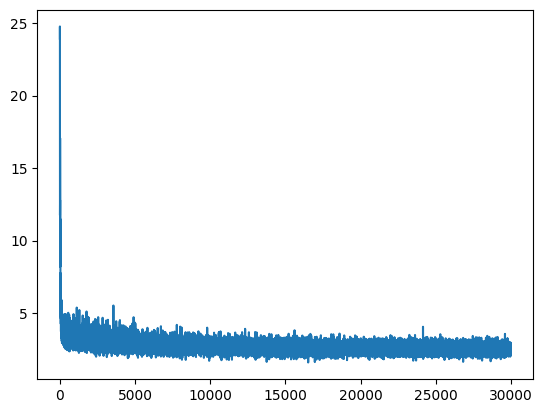

In [160]:
plt.plot(stepi, lossi)
plt.show()

This is thick, because we are optimizing on minibatches and minibatches create sort of noise

In [168]:
# loss on training dataset
emb = C[Xtr] 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2490200996398926

In [169]:
# loss on dev dataset
emb = C[Xdev] 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.25418758392334

One more bottleneck should be the embedding size. We can try increasing it.

## Visualizing character emebddings

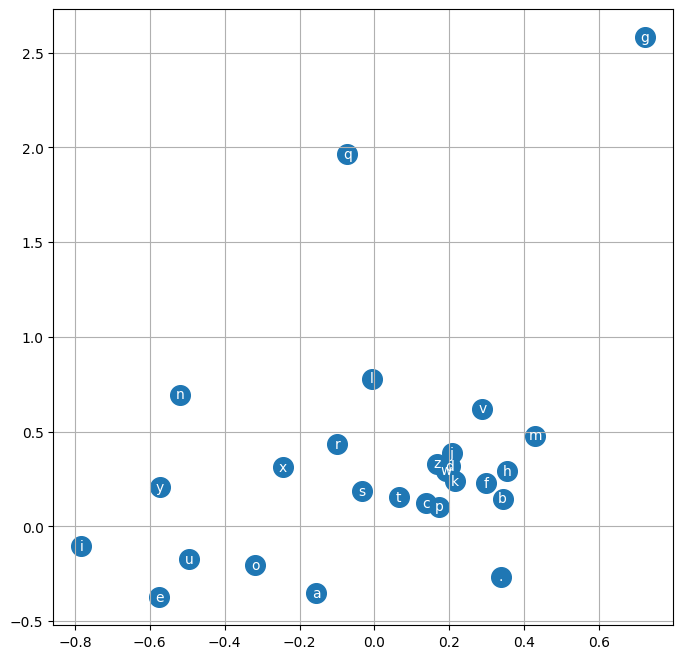

In [171]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

## Larger Embedding size

In [172]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g) 
W1 = torch.randn((30, 200), generator=g) # 3 times 10 = 30 input
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [173]:
sum(p.nelement() for p in parameters)

11897

In [174]:
for p in parameters:
    p.requires_grad = True

In [175]:
lossi = []
stepi = []

In [180]:
for i in range(50000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    # lr = 0.1
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item()) # taking log of loss so that we can plot log loss, just to get nice presentation

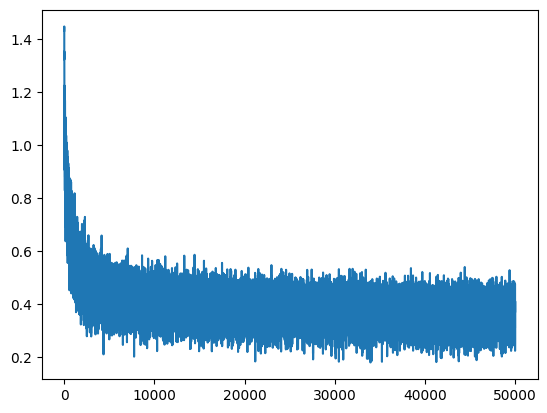

In [177]:
plt.plot(stepi, lossi)
plt.show()

In [181]:
# loss on training dataset
emb = C[Xtr] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.1619441509246826

In [182]:
# loss on dev dataset
emb = C[Xdev] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.1907970905303955

## Sampling from model

In [184]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        
        if ix == 0:
            break
    print("".join(itos[i] for i in out))

junide.
janasar.
prefay.
adria.
jiisleighan.
juwen.
sameia.
yanilenias.
dedaile.
immadse.
sinayla.
terinleem.
haf.
demmercennelina.
jaylie.
raaya.
jocely.
jamiyandemous.
wynn.
sanaashamilianna.


Note to self:
- Read Bengio03 paper
- Improve this model by trying different more hyperparameters
- Look at the paper as it has some good ideas to improve the model